In [ ]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns #barplot, lineplot, plot

# chargement et affichage du fichier des pays- Choix des colonnes Code pays, Nom de pays, Region, Income Group pour études des variables
# les individus seront les pays
# chargement du fichier dans une dataframe
df_pays = pd.read_csv(r"C:\\Users\\Catherine\\EdStatsCountry.csv", sep= ',',usecols=['Country Code', 'Table Name','Region', 'Income Group'
       ])
df_pays.shape

In [ ]:
# on obtient une df de 241 lignes et 4 colonnes
# nettoyage des lignes présentant des valeurs manquantes
# Ce sont des lignes non représentatives de pays - par exemple : lignes Union européènne ou OCDE
index_with_nan = df_pays.index[df_pays.iloc[:,2].isnull()]

df_pays.drop(index_with_nan,0, inplace=True)

In [ ]:
df_pays.info()

In [ ]:
# chargement et affichage fichier des données d'éducation par code pays
# l'indicator name comporte toutes les valeurs éducatives
# donc pour 1 pays on a autant de lignes valeurs éducatives
# on a aussi les colonnes dates en fin de fichier, de la colonne "1970" à "2100"
# pour résumer ce fichier 1 ligne par pays et ^par valeur éducative avec 7 références de dates - 2005 pour l'étude des IT - 2015 les valeurs éducatives et 2020 à 2040 pour l'évolution 
df = pd.read_csv(r"C:\\Users\\Catherine\\EdStatsData.csv", sep= ',',usecols=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2015', '2020', '2025','2030','2035','2040'])
df.shape

In [6]:
# on ne va garder que 8 (4+4) valeurs éducatives pour l'étude (% et nombre de population associée) :

# % 15-19 by highest level of educational attainment. Upper Secondary. Total","PRJ.ATT.1519.3.MF"
# % 15-19 by highest level of educational attainment. Post Secondary. Total","PRJ.ATT.1519.4.MF"
# % 20-24 by highest level of educational attainment. Upper Secondary. Total","PRJ.ATT.2024.3.MF"
# % 20-24 by highest level of educational attainment. Post Secondary. Total","PRJ.ATT.2024.4.MF"

# Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total","PRJ.POP.1519.3.MF
# Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total","PRJ.POP.2024.3.MF
# Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total","PRJ.POP.1519.4.MF
# Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total","PRJ.POP.2024.4.MF

boolean_indicies = df["Indicator Code"].isin(['PRJ.ATT.1519.3.MF','PRJ.POP.1519.3.MF','PRJ.ATT.1519.4.MF','PRJ.POP.1519.4.MF','PRJ.ATT.2024.3.MF','PRJ.POP.2024.3.MF','PRJ.ATT.2024.4.MF','PRJ.POP.2024.4.MF'])
df = df[boolean_indicies]
df.shape

(1936, 10)

In [7]:
# supprimer des lignes avec des valeurs manquantes
index_with_nan = df.index[df.isnull().any(axis=1)]
df.drop(index_with_nan,0, inplace=True)

In [8]:
df.shape

(1336, 10)

In [9]:
# df_save servira ultérieurement à l'étude de l'évolution des chiffres
df_save = df.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 91376 to 886885
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1336 non-null   object 
 1   Country Code    1336 non-null   object 
 2   Indicator Name  1336 non-null   object 
 3   Indicator Code  1336 non-null   object 
 4   2015            1336 non-null   float64
 5   2020            1336 non-null   float64
 6   2025            1336 non-null   float64
 7   2030            1336 non-null   float64
 8   2035            1336 non-null   float64
 9   2040            1336 non-null   float64
dtypes: float64(6), object(4)
memory usage: 114.8+ KB


In [11]:
# Pivoter pour avoir les valeurs 2015 en colonnes
students_df15 = df.pivot(index='Country Code',columns='Indicator Code',values='2015')

In [12]:
students_df15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, ABW to ZWE
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRJ.ATT.1519.3.MF  167 non-null    float64
 1   PRJ.ATT.1519.4.MF  167 non-null    float64
 2   PRJ.ATT.2024.3.MF  167 non-null    float64
 3   PRJ.ATT.2024.4.MF  167 non-null    float64
 4   PRJ.POP.1519.3.MF  167 non-null    float64
 5   PRJ.POP.1519.4.MF  167 non-null    float64
 6   PRJ.POP.2024.3.MF  167 non-null    float64
 7   PRJ.POP.2024.4.MF  167 non-null    float64
dtypes: float64(8)
memory usage: 11.7+ KB


In [13]:
# on ne prend que les pays qui sont en commun entre les 2 dataframes
df_merge = pd.merge(students_df15, df_pays, on=["Country Code"])

In [14]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Code       166 non-null    object 
 1   PRJ.ATT.1519.3.MF  166 non-null    float64
 2   PRJ.ATT.1519.4.MF  166 non-null    float64
 3   PRJ.ATT.2024.3.MF  166 non-null    float64
 4   PRJ.ATT.2024.4.MF  166 non-null    float64
 5   PRJ.POP.1519.3.MF  166 non-null    float64
 6   PRJ.POP.1519.4.MF  166 non-null    float64
 7   PRJ.POP.2024.3.MF  166 non-null    float64
 8   PRJ.POP.2024.4.MF  166 non-null    float64
 9   Table Name         166 non-null    object 
 10  Region             166 non-null    object 
 11  Income Group       166 non-null    object 
dtypes: float64(8), object(4)
memory usage: 16.9+ KB


In [15]:
# Pour la valeur IT j'ai pris comme référence l'année 2005 - il n'y a pas de données IT dans les années 2015 à 2040  
# je ferai un merge des 2 dataframes pour faire l'étude commerciale

df_IT = pd.read_csv(r"C:\\Users\\Catherine\\EdStatsData.csv", sep= ',',usecols=['Country Code', 'Indicator Name', 'Indicator Code',
       '2005'])
df_IT.shape

(886930, 4)

In [16]:
# IT.CMP.PCMP.P2 personal computer per 100 persons
boolean_indicies = df_IT["Indicator Code"].isin(['IT.CMP.PCMP.P2'])
df_IT = df_IT[boolean_indicies]
df_IT.shape

(242, 4)

In [17]:
df_IT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 2084 to 885349
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    242 non-null    object 
 1   Indicator Name  242 non-null    object 
 2   Indicator Code  242 non-null    object 
 3   2005            196 non-null    float64
dtypes: float64(1), object(3)
memory usage: 9.5+ KB


In [18]:
# df_IT contient des valeurs manquantes - nettoyage
index_with_nan = df_IT.index[df_IT.isnull().any(axis=1)]
df_IT.drop(index_with_nan,0, inplace=True)
df_IT.shape

(196, 4)

In [19]:
# supprimer colonnes 'Indicator Code' et 'Indicator Name'
df_IT.drop(['Indicator Code','Indicator Name'], axis = 1, inplace = True)

In [20]:
# on ne prend que les pays en commun entre la dataframe des valeurs éducatives 2015 à 2040 et la dataframe IT 2005
df_merge = pd.merge(df_merge, df_IT, on=["Country Code"])

In [21]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Code       148 non-null    object 
 1   PRJ.ATT.1519.3.MF  148 non-null    float64
 2   PRJ.ATT.1519.4.MF  148 non-null    float64
 3   PRJ.ATT.2024.3.MF  148 non-null    float64
 4   PRJ.ATT.2024.4.MF  148 non-null    float64
 5   PRJ.POP.1519.3.MF  148 non-null    float64
 6   PRJ.POP.1519.4.MF  148 non-null    float64
 7   PRJ.POP.2024.3.MF  148 non-null    float64
 8   PRJ.POP.2024.4.MF  148 non-null    float64
 9   Table Name         148 non-null    object 
 10  Region             148 non-null    object 
 11  Income Group       148 non-null    object 
 12  2005               148 non-null    float64
dtypes: float64(9), object(4)
memory usage: 16.2+ KB


In [22]:
# renommage des colonnes
df_merge.columns = ['Code pays','% 15-19 niv II','% 15-19 niv III','% 20-24 niv II','% 20-24 niv III','Nb millier 1519 II','Nb millier 1519 III','Nb millier 2024 II','Nb millier 2024 III','Nom pays','Region','Niveau de revenus','IT per 100 pers.']

In [23]:
# Réorganisation de la dataframe
df_merge = df_merge.reindex(columns=['Code pays','Nom pays','Region','Niveau de revenus','IT per 100 pers.','Nb millier 1519 II','% 15-19 niv II','Nb millier 1519 III','% 15-19 niv III','Nb millier 2024 II','% 20-24 niv II','Nb millier 2024 III','% 20-24 niv III'])

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

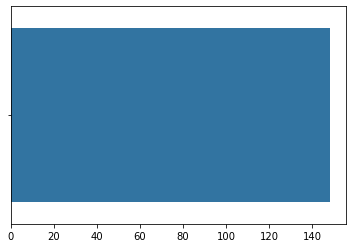

In [25]:
# vérification des moyennes de toutes les valeurs
df_merge.mean()

IT per 100 pers.         16.081649
Nb millier 1519 II      997.897162
% 15-19 niv II            0.210405
Nb millier 1519 III      57.409662
% 15-19 niv III           0.011284
Nb millier 2024 II     1321.178108
% 20-24 niv II            0.391486
Nb millier 2024 III     494.498041
% 20-24 niv III           0.127162
dtype: float64

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

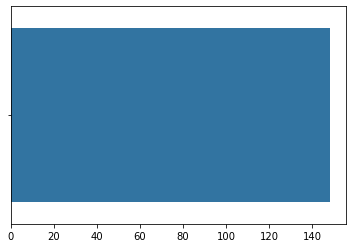

In [27]:
# vérification des medianes de toutes les valeurs
df_merge.median()

IT per 100 pers.         6.680545
Nb millier 1519 II      86.140000
% 15-19 niv II           0.175000
Nb millier 1519 III      0.350000
% 15-19 niv III          0.000000
Nb millier 2024 II     206.345000
% 20-24 niv II           0.370000
Nb millier 2024 III     53.620000
% 20-24 niv III          0.095000
dtype: float64

In [29]:
# calcul des moyennes des valeurs par région mondiale
df_merge.groupby('Region').mean()

,IT per 100 pers.,Nb millier 1519 II,% 15-19 niv II,Nb millier 1519 III,% 15-19 niv III,Nb millier 2024 II,% 20-24 niv II,Nb millier 2024 III,% 20-24 niv III
Region,,,,,,,,,
East Asia & Pacific,18.313042,2688.727000,0.346500,320.709000,0.037000,2458.073000,0.392000,1514.152500,0.212500
Europe & Central Asia,31.698280,347.400000,0.294762,5.183810,0.005952,791.258333,0.642619,195.510238,0.166905
Latin America & Caribbean,8.215531,393.096296,0.184815,22.084815,0.015556,800.385926,0.348519,238.278148,0.132963
Middle East & North Africa,13.623259,471.332308,0.241538,18.866923,0.013846,789.026923,0.407692,269.513077,0.154615
North America,82.500234,3834.015000,0.495000,92.270000,0.020000,8539.485000,0.610000,2897.030000,0.320000
South Asia,4.092323,9909.428000,0.172000,141.626000,0.004000,9473.162000,0.246000,3176.172000,0.084000
Sub-Saharan Africa,2.515681,137.624359,0.047436,3.346154,0.000513,431.474359,0.152564,78.952051,0.023077


In [30]:
# Pour la valeur IT 
# pour faire mon choix de pays je compare les moyennes de chaque pays à la moyenne générale de 16 ordinateurs par 100 personnes

# on va se baser sur les valeurs de la moyenne générale pour épurer la df
# on va retirer les pays qui présentent moins de 16 ordinateurs par personne  

index_names =  df_merge[(df_merge["IT per 100 pers."] < 16)].index

df_merge.drop(index_names, inplace=True)

In [31]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 2 to 139
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code pays            40 non-null     object 
 1   Nom pays             40 non-null     object 
 2   Region               40 non-null     object 
 3   Niveau de revenus    40 non-null     object 
 4   IT per 100 pers.     40 non-null     float64
 5   Nb millier 1519 II   40 non-null     float64
 6   % 15-19 niv II       40 non-null     float64
 7   Nb millier 1519 III  40 non-null     float64
 8   % 15-19 niv III      40 non-null     float64
 9   Nb millier 2024 II   40 non-null     float64
 10  % 20-24 niv II       40 non-null     float64
 11  Nb millier 2024 III  40 non-null     float64
 12  % 20-24 niv III      40 non-null     float64
dtypes: float64(9), object(4)
memory usage: 4.4+ KB


In [32]:
# calcul des statistiques descriptives de la série
df_merge.describe()

,IT per 100 pers.,Nb millier 1519 II,% 15-19 niv II,Nb millier 1519 III,% 15-19 niv III,Nb millier 2024 II,% 20-24 niv II,Nb millier 2024 III,% 20-24 niv III
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,46.245101,503.707500,0.301250,20.715000,0.017500,1107.686500,0.560250,352.392250,0.213750
std,22.169936,1144.954806,0.182815,56.105916,0.031925,2756.962998,0.163636,783.987891,0.146527
min,16.116693,3.790000,0.070000,0.000000,0.000000,10.210000,0.220000,0.850000,0.010000
25%,25.948868,29.345000,0.180000,0.000000,0.000000,87.797500,0.492500,14.377500,0.117500
50%,48.452495,86.140000,0.240000,0.700000,0.000000,236.710000,0.545000,73.265000,0.210000
75%,60.534454,274.192500,0.420000,9.417500,0.020000,749.377500,0.650000,340.787500,0.272500
max,87.728023,6289.380000,0.730000,328.740000,0.120000,15751.580000,0.930000,4707.950000,0.760000


In [33]:
# Pour la valeur IT : moyenne de 46 IT pour 100 personnes - un écart type de 22 - un min de 16 et max de 87 c'est correct
# valeur 15-19 niveau II complété : moyenne de 30%, écart type de 18%, min de 7% max de 73 % - Pour la distribution des données 1/4
# est autour de 18%, un 2eme quart de 18 à 24%, un 3ème quart de 24 à 42% et le dernier quart de 42 à 73%

# Pour la 2ème valeur % 15-19 niv II, je vais supprimer les pays qui ont un tux < 30%
# on va retirer les lignes qui présentent un taux de niveau II < 0.30 pour les 15-19
index_names =  df_merge[(df_merge["% 15-19 niv II"] < 0.30)].index

df_merge.drop(index_names, inplace=True)

In [34]:
# calcul des statistiques descriptives de la série
df_merge.describe()

,IT per 100 pers.,Nb millier 1519 II,% 15-19 niv II,Nb millier 1519 III,% 15-19 niv III,Nb millier 2024 II,% 20-24 niv II,Nb millier 2024 III,% 20-24 niv III
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,44.171122,769.355294,0.474706,39.146471,0.035294,1349.683529,0.553529,527.590588,0.285294
std,21.210307,1556.124042,0.145736,80.817490,0.042296,3756.470667,0.162594,1139.011548,0.172269
min,17.489091,8.920000,0.300000,0.000000,0.000000,12.240000,0.220000,7.220000,0.070000
25%,27.019541,44.170000,0.320000,1.170000,0.000000,59.860000,0.510000,24.940000,0.140000
50%,37.628187,214.640000,0.470000,7.530000,0.010000,326.510000,0.530000,106.130000,0.260000
75%,56.961536,260.160000,0.610000,41.540000,0.060000,560.310000,0.650000,340.220000,0.350000
max,87.728023,6289.380000,0.730000,328.740000,0.120000,15751.580000,0.870000,4707.950000,0.760000


In [37]:
# la valeur % 15-19 niv III a une moyenne de 3% compréhensible car cette tranche d'âge n'est pas encore en niveau supérieur
# la valeur % 20-24 niv II a une moyenne de 56% , un min de 22%, un max de 93%
# je supprime les pays qui ont un taux de % 20-24 niv II < 22%
index_names =  df_merge[(df_merge["% 20-24 niv II"] < 0.23)].index

df_merge.drop(index_names, inplace=True)

In [38]:
df_merge.describe()

,IT per 100 pers.,Nb millier 1519 II,% 15-19 niv II,Nb millier 1519 III,% 15-19 niv III,Nb millier 2024 II,% 20-24 niv II,Nb millier 2024 III,% 20-24 niv III
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000
mean,42.816624,804.025000,0.471875,38.996875,0.031250,1427.910000,0.574375,539.30125,0.255625
std,21.132922,1600.362702,0.150032,83.465514,0.040146,3865.338954,0.142547,1175.30861,0.125271
min,17.489091,8.920000,0.300000,0.000000,0.000000,12.240000,0.290000,7.22000,0.070000
25%,26.591660,40.580000,0.317500,1.060000,0.000000,58.790000,0.525000,22.25250,0.137500
50%,36.703400,187.175000,0.460000,6.020000,0.010000,327.745000,0.540000,93.53500,0.260000
75%,55.795344,539.782500,0.615000,26.640000,0.045000,727.892500,0.650000,424.57500,0.320000
max,87.728023,6289.380000,0.730000,328.740000,0.120000,15751.580000,0.870000,4707.95000,0.500000


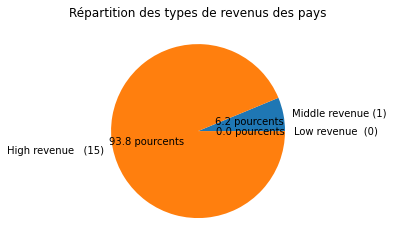

In [39]:
# comment se répartissent les revenus de cette série ?      
middle_mps = df_merge[df_merge["Niveau de revenus"] == "Upper middle income"]
 
high_mps  =   df_merge[df_merge["Niveau de revenus"] == "High income: OECD"] 
        
high_mps1  =   df_merge[df_merge["Niveau de revenus"] == "High income: nonOECD"] 
        
low_mps  =   df_merge[df_merge["Niveau de revenus"] == "Low income"] 
        
low_mps1  =   df_merge[df_merge["Niveau de revenus"] == "Lower middle income"] 
        
counts = [len(middle_mps), len(high_mps) + len(high_mps1) , len(low_mps)+ len(low_mps1) ]
counts = np.array(counts)
nb_mps = counts.sum()
proportions = counts / nb_mps

labels = ["Middle revenue ({})".format(counts[0]), "High revenue   ({})".format(counts[1]), "Low revenue  ({})".format(counts[2])]

fig, ax = plt.subplots()
ax.axis("equal")
ax.pie(
       proportions,
       labels=labels,
       autopct="%1.1f pourcents"
       )
plt.title("Répartition des types de revenus des pays".format("Pie chart", nb_mps))
plt.show()

In [40]:
# df_region comporte les moyennes des regions
df_region = df_merge.groupby('Region').mean()

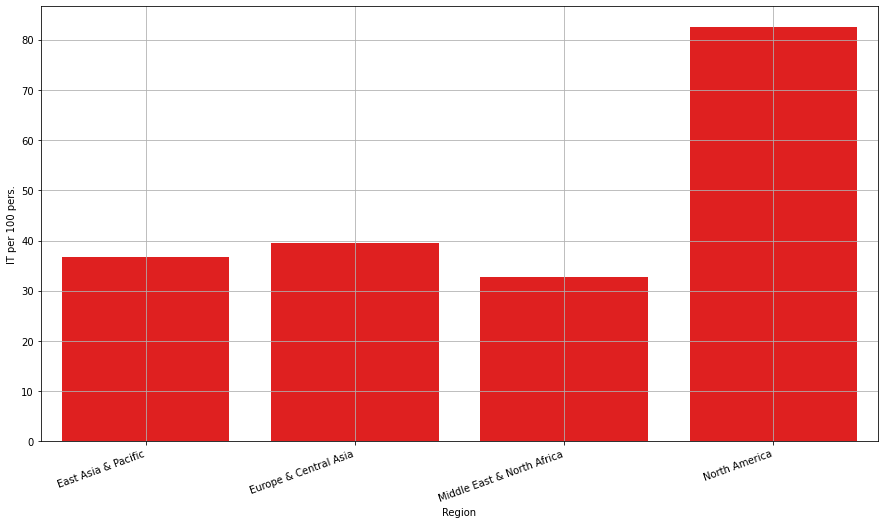

In [60]:
# diagramme en baton des ITs par région 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({"IT per 100 pers.": df_region['IT per 100 pers.'].values,
                    "Region": df_region.index})
plt.figure(figsize=(15,8))
s1 = sns.barplot(x = 'Region', y = 'IT per 100 pers.', data = df, color = 'red')
plt.setp(s1.get_xticklabels(), rotation=20, ha='right')
plt.grid(True)

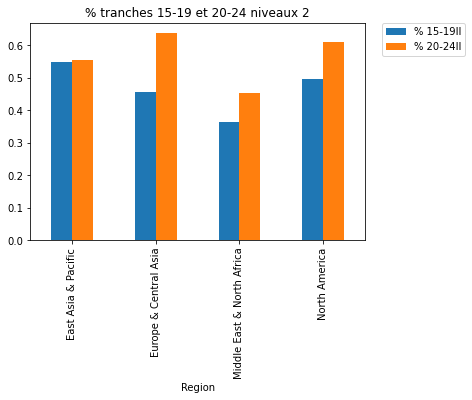

In [61]:
valeurs1 = df_region['% 15-19 niv II'].values 
valeurs2 = df_region['% 20-24 niv II'].values
import pandas as pd

mydata = pd.DataFrame({"% 15-19II": valeurs1,"% 20-24II": valeurs2})

mydata.index = df_region.index

from pandas import plotting

mydata.plot(kind="bar",rot=90) # Cette fonction fabrique automatiquement un diagramme à barres regroupées à partir d'une dataframe (rot : orientation des étiquettes)
plt.title ('% tranches 15-19 et 20-24 niveaux 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

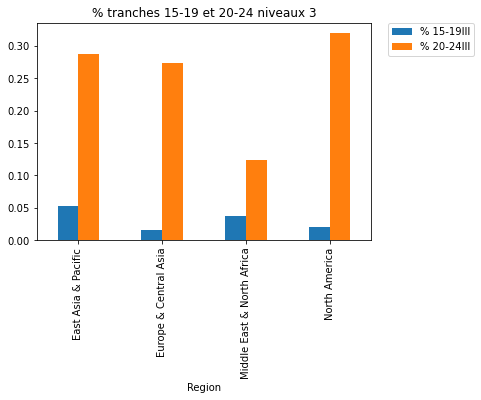

In [43]:
valeurs1 = df_region['% 15-19 niv III'].values 
valeurs2 = df_region['% 20-24 niv III'].values
import pandas as pd

mydata = pd.DataFrame({"% 15-19III": valeurs1,"% 20-24III": valeurs2})

mydata.index = df_region.index

from pandas import plotting

mydata.plot(kind="bar",rot=90) # Cette fonction fabrique automatiquement un diagramme à barres regroupées à partir d'une dataframe (rot : orientation des étiquettes)
plt.title ('% tranches 15-19 et 20-24 niveaux 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [44]:
# Ajout des colonnes des moyennes en ligne des % 15-19 et 20-24
df_merge['AVG-15-19'] = df_merge[['% 15-19 niv II', '% 15-19 niv III']].mean(axis=1)
df_merge['AVG-20-24'] = df_merge[['% 20-24 niv II', '% 20-24 niv III']].mean(axis=1)
df_merge['NB-15-19'] = df_merge[['Nb millier 1519 II', 'Nb millier 1519 III']].mean(axis=1)
df_merge['NB-20-24'] = df_merge[['Nb millier 2024 II', 'Nb millier 2024 III']].mean(axis=1)

In [45]:
# tri des pays par ordre de IT croissant
#tri de la dataframe
df_merge.sort_values(by=['IT per 100 pers.'])

,Code pays,Nom pays,Region,Niveau de revenus,IT per 100 pers.,Nb millier 1519 II,% 15-19 niv II,Nb millier 1519 III,% 15-19 niv III,Nb millier 2024 II,% 20-24 niv II,Nb millier 2024 III,% 20-24 niv III,AVG-15-19,AVG-20-24,NB-15-19,NB-20-24
93,NCL,New Caledonia,East Asia & Pacific,High income: nonOECD,17.489091,13.99,0.63,1.88,0.09,12.24,0.53,7.22,0.31,0.360,0.420,7.935,9.730
110,QAT,Qatar,Middle East & North Africa,High income: nonOECD,17.657969,27.95,0.31,8.75,0.10,32.25,0.29,14.19,0.13,0.205,0.210,18.350,23.220
91,MYS,Malaysia,East Asia & Pacific,Upper middle income,21.668920,1913.18,0.67,328.74,0.12,1230.64,0.47,932.22,0.35,0.395,0.410,1120.960,1081.430
2,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD,25.308017,260.16,0.47,1.97,0.00,328.98,0.51,65.59,0.10,0.235,0.305,131.065,197.285
34,CYP,Cyprus,Europe & Central Asia,High income: nonOECD,27.019541,44.17,0.61,0.73,0.01,59.86,0.65,28.02,0.30,0.310,0.475,22.450,43.940
35,CZE,Czech Republic,Europe & Central Asia,High income: OECD,27.368652,218.94,0.45,1.17,0.00,560.31,0.82,80.94,0.12,0.225,0.470,110.055,320.625
78,MAC,"Macao SAR, China",East Asia & Pacific,High income: nonOECD,34.177153,8.92,0.30,0.00,0.00,24.99,0.53,9.78,0.21,0.150,0.370,4.460,17.385
122,SVK,Slovak Republic,Europe & Central Asia,High income: OECD,35.778613,140.33,0.48,0.00,0.00,330.04,0.87,24.94,0.07,0.240,0.470,70.165,177.490
8,BEL,Belgium,Europe & Central Asia,High income: OECD,37.628187,229.69,0.38,7.53,0.01,350.10,0.53,255.36,0.39,0.195,0.460,118.610,302.730
100,NZL,New Zealand,East Asia & Pacific,High income: OECD,50.240475,225.44,0.73,11.42,0.04,208.84,0.60,106.13,0.31,0.385,0.455,118.430,157.485


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({"IT per 100 pers.": df_merge['IT per 100 pers.'].values,
                    "Nom pays": df_merge['Nom pays'].values})
plt.figure(figsize=(20,12))

plt.xticks(fontsize=12)
s1 = sns.barplot(x = 'Nom pays', y = 'IT per 100 pers.', data = df, color = 'red')
plt.setp(s1.get_xticklabels(), rotation=20, ha='right')
plt.grid(True)

In [ ]:
# tri des pays par ordre de IT croissant
#tri de la dataframe
df_merge.sort_values(by=['AVG-15-19'])

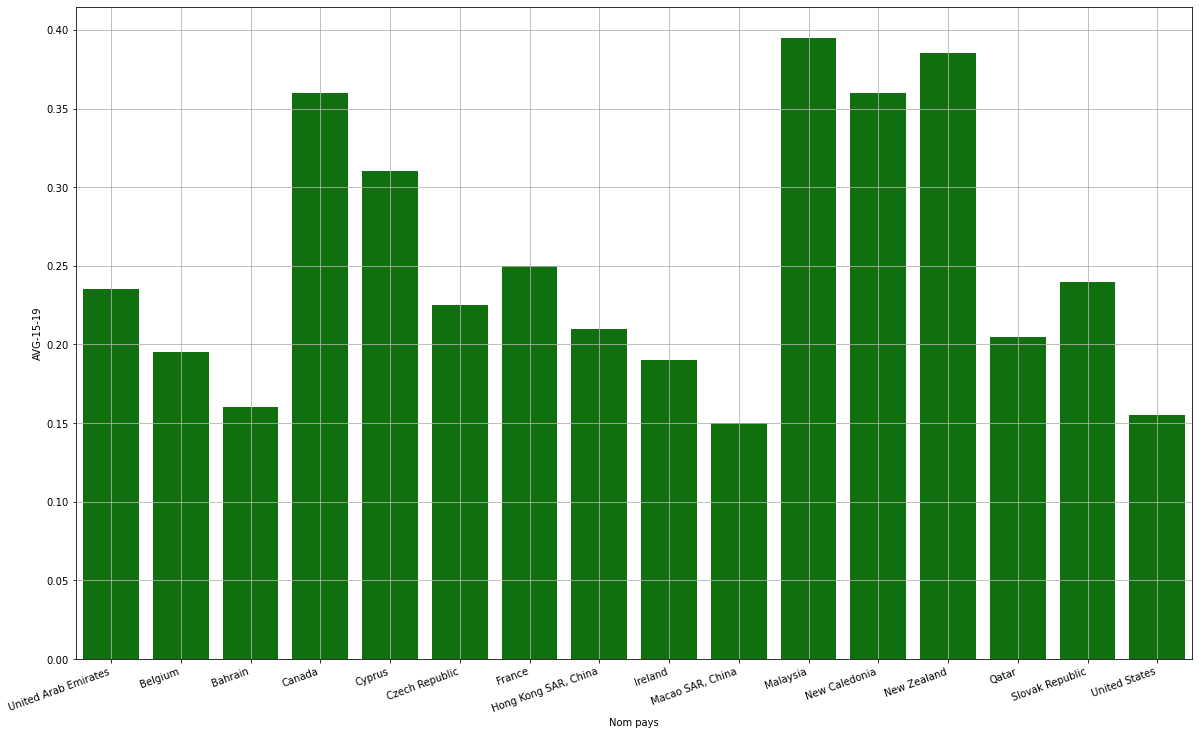

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({"AVG-15-19": df_merge['AVG-15-19'].values,
                    "Nom pays": df_merge['Nom pays'].values})
plt.figure(figsize=(20,12))
s1 = sns.barplot(x = 'Nom pays', y = 'AVG-15-19', data = df, color = 'green')
plt.setp(s1.get_xticklabels(), rotation=20, ha='right')
plt.grid(True)

,Code pays,Nom pays,Region,Niveau de revenus,IT per 100 pers.,Nb millier 1519 II,% 15-19 niv II,Nb millier 1519 III,% 15-19 niv III,Nb millier 2024 II,% 20-24 niv II,Nb millier 2024 III,% 20-24 niv III,AVG-15-19,AVG-20-24,NB-15-19,NB-20-24
110,QAT,Qatar,Middle East & North Africa,High income: nonOECD,17.657969,27.95,0.31,8.75,0.10,32.25,0.29,14.19,0.13,0.205,0.210,18.350,23.220
2,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD,25.308017,260.16,0.47,1.97,0.00,328.98,0.51,65.59,0.10,0.235,0.305,131.065,197.285
12,BHR,Bahrain,Middle East & North Africa,High income: nonOECD,55.406613,29.81,0.31,0.67,0.01,55.58,0.56,14.19,0.14,0.160,0.350,15.240,34.885
78,MAC,"Macao SAR, China",East Asia & Pacific,High income: nonOECD,34.177153,8.92,0.30,0.00,0.00,24.99,0.53,9.78,0.21,0.150,0.370,4.460,17.385
45,FRA,France,Europe & Central Asia,High income: OECD,56.961536,1835.17,0.49,54.78,0.01,2125.96,0.55,1015.66,0.26,0.250,0.405,944.975,1570.810
91,MYS,Malaysia,East Asia & Pacific,Upper middle income,21.668920,1913.18,0.67,328.74,0.12,1230.64,0.47,932.22,0.35,0.395,0.410,1120.960,1081.430
93,NCL,New Caledonia,East Asia & Pacific,High income: nonOECD,17.489091,13.99,0.63,1.88,0.09,12.24,0.53,7.22,0.31,0.360,0.420,7.935,9.730
139,USA,United States,North America,High income: OECD,77.272444,6289.38,0.31,100.62,0.00,15751.58,0.69,4707.95,0.21,0.155,0.450,3195.000,10229.765
62,IRL,Ireland,Europe & Central Asia,High income: OECD,52.861927,93.21,0.32,17.26,0.06,121.29,0.41,148.38,0.50,0.190,0.455,55.235,134.835
100,NZL,New Zealand,East Asia & Pacific,High income: OECD,50.240475,225.44,0.73,11.42,0.04,208.84,0.60,106.13,0.31,0.385,0.455,118.430,157.485


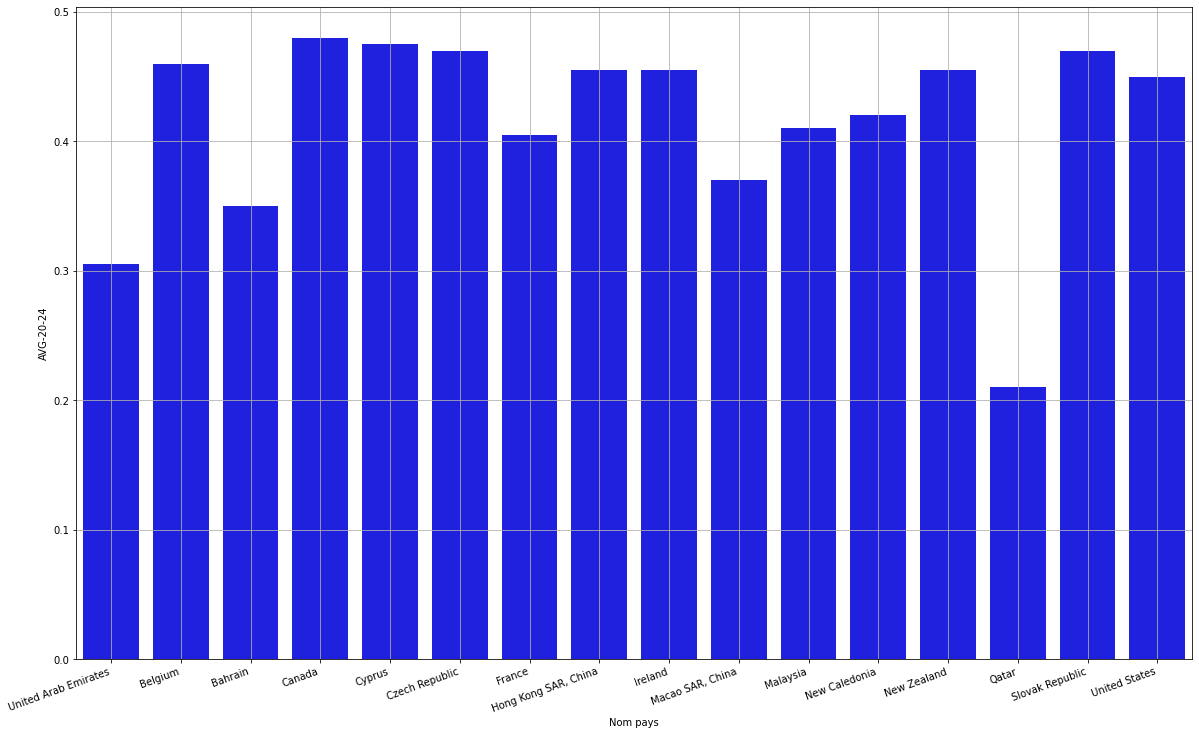

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({"AVG-20-24": df_merge['AVG-20-24'].values,
                    "Nom pays": df_merge['Nom pays'].values})
plt.figure(figsize=(20,12))
s1 = sns.barplot(x = 'Nom pays', y = 'AVG-20-24', data = df, color = 'blue')
plt.setp(s1.get_xticklabels(), rotation=20, ha='right')
plt.grid(True)




# tri des pays par ordre de IT croissant
#tri de la dataframe
df_merge.sort_values(by=['AVG-20-24'])

In [66]:
# tri des pays par ordre de IT croissant
#tri de la dataframe
df_merge.sort_values(by=['NB-15-19'])

,Code pays,Nom pays,Region,Niveau de revenus,IT per 100 pers.,Nb millier 1519 II,% 15-19 niv II,Nb millier 1519 III,% 15-19 niv III,Nb millier 2024 II,% 20-24 niv II,Nb millier 2024 III,% 20-24 niv III,AVG-15-19,AVG-20-24,NB-15-19,NB-20-24
78,MAC,"Macao SAR, China",East Asia & Pacific,High income: nonOECD,34.177153,8.92,0.30,0.00,0.00,24.99,0.53,9.78,0.21,0.150,0.370,4.460,17.385
93,NCL,New Caledonia,East Asia & Pacific,High income: nonOECD,17.489091,13.99,0.63,1.88,0.09,12.24,0.53,7.22,0.31,0.360,0.420,7.935,9.730
12,BHR,Bahrain,Middle East & North Africa,High income: nonOECD,55.406613,29.81,0.31,0.67,0.01,55.58,0.56,14.19,0.14,0.160,0.350,15.240,34.885
110,QAT,Qatar,Middle East & North Africa,High income: nonOECD,17.657969,27.95,0.31,8.75,0.10,32.25,0.29,14.19,0.13,0.205,0.210,18.350,23.220
34,CYP,Cyprus,Europe & Central Asia,High income: nonOECD,27.019541,44.17,0.61,0.73,0.01,59.86,0.65,28.02,0.30,0.310,0.475,22.450,43.940
62,IRL,Ireland,Europe & Central Asia,High income: OECD,52.861927,93.21,0.32,17.26,0.06,121.29,0.41,148.38,0.50,0.190,0.455,55.235,134.835
122,SVK,Slovak Republic,Europe & Central Asia,High income: OECD,35.778613,140.33,0.48,0.00,0.00,330.04,0.87,24.94,0.07,0.240,0.470,70.165,177.490
56,HKG,"Hong Kong SAR, China",East Asia & Pacific,High income: nonOECD,60.498825,155.41,0.41,4.51,0.01,326.51,0.65,132.14,0.26,0.210,0.455,79.960,229.325
35,CZE,Czech Republic,Europe & Central Asia,High income: OECD,27.368652,218.94,0.45,1.17,0.00,560.31,0.82,80.94,0.12,0.225,0.470,110.055,320.625
100,NZL,New Zealand,East Asia & Pacific,High income: OECD,50.240475,225.44,0.73,11.42,0.04,208.84,0.60,106.13,0.31,0.385,0.455,118.430,157.485


In [51]:
# tri des pays par ordre de IT croissant
#tri de la dataframe
df_merge.sort_values(by=['NB-20-24'])

,Code pays,Nom pays,Region,Niveau de revenus,IT per 100 pers.,Nb millier 1519 II,% 15-19 niv II,Nb millier 1519 III,% 15-19 niv III,Nb millier 2024 II,% 20-24 niv II,Nb millier 2024 III,% 20-24 niv III,AVG-15-19,AVG-20-24,NB-15-19,NB-20-24
93,NCL,New Caledonia,East Asia & Pacific,High income: nonOECD,17.489091,13.99,0.63,1.88,0.09,12.24,0.53,7.22,0.31,0.360,0.420,7.935,9.730
78,MAC,"Macao SAR, China",East Asia & Pacific,High income: nonOECD,34.177153,8.92,0.30,0.00,0.00,24.99,0.53,9.78,0.21,0.150,0.370,4.460,17.385
110,QAT,Qatar,Middle East & North Africa,High income: nonOECD,17.657969,27.95,0.31,8.75,0.10,32.25,0.29,14.19,0.13,0.205,0.210,18.350,23.220
12,BHR,Bahrain,Middle East & North Africa,High income: nonOECD,55.406613,29.81,0.31,0.67,0.01,55.58,0.56,14.19,0.14,0.160,0.350,15.240,34.885
34,CYP,Cyprus,Europe & Central Asia,High income: nonOECD,27.019541,44.17,0.61,0.73,0.01,59.86,0.65,28.02,0.30,0.310,0.475,22.450,43.940
62,IRL,Ireland,Europe & Central Asia,High income: OECD,52.861927,93.21,0.32,17.26,0.06,121.29,0.41,148.38,0.50,0.190,0.455,55.235,134.835
100,NZL,New Zealand,East Asia & Pacific,High income: OECD,50.240475,225.44,0.73,11.42,0.04,208.84,0.60,106.13,0.31,0.385,0.455,118.430,157.485
122,SVK,Slovak Republic,Europe & Central Asia,High income: OECD,35.778613,140.33,0.48,0.00,0.00,330.04,0.87,24.94,0.07,0.240,0.470,70.165,177.490
2,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD,25.308017,260.16,0.47,1.97,0.00,328.98,0.51,65.59,0.10,0.235,0.305,131.065,197.285
56,HKG,"Hong Kong SAR, China",East Asia & Pacific,High income: nonOECD,60.498825,155.41,0.41,4.51,0.01,326.51,0.65,132.14,0.26,0.210,0.455,79.960,229.325


In [ ]:
# pour les 5 pays choisis, évolution des 4 indicateurs éducation
boolean_indicies = (df_save["Indicator Code"].isin(['PRJ.ATT.1519.3.MF','PRJ.ATT.1519.4.MF','PRJ.ATT.2024.3.MF','PRJ.ATT.2024.4.MF'])&
                   df_save["Country Code"].isin(['FRA', 'BEL', 'NZL', 'SVK', 'CAN'])) 
                                 
df2 = df_save[boolean_indicies]

In [ ]:
boolean_indicies = (df2["Indicator Code"].isin(['PRJ.ATT.1519.3.MF','PRJ.ATT.1519.4.MF']))
                                               
df1519 = df2[boolean_indicies]
boolean_indicies = (df2["Indicator Code"].isin(['PRJ.ATT.2024.3.MF','PRJ.ATT.2024.4.MF']))
                                               
df2024 = df2[boolean_indicies]

In [ ]:
df1519 = df1519.groupby('Country Name').mean()
df2024 = df2024.groupby('Country Name').mean()

df1519

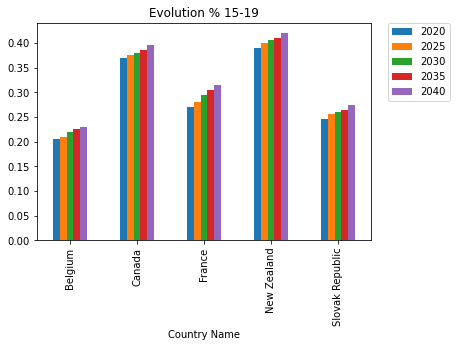

In [55]:
valeurs1 = df1519['2020'].values 
valeurs2 = df1519['2025'].values
valeurs3 = df1519['2030'].values
valeurs4 = df1519['2035'].values
valeurs5 = df1519['2040'].values

import pandas as pd

mydata = pd.DataFrame({"2020": valeurs1,"2025": valeurs2, "2030": valeurs3, "2035": valeurs4, "2040": valeurs5 })

mydata.index = df1519.index

from pandas import plotting

mydata.plot(kind="bar",rot=90) # Cette fonction fabrique automatiquement un diagramme à barres regroupées à partir d'une dataframe (rot : orientation des étiquettes)
plt.title ('Evolution % 15-19')
ax.set_ylabel('% 15-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

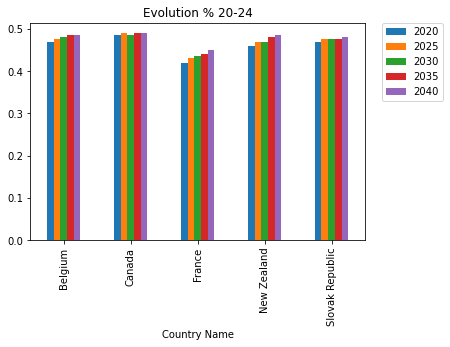

In [57]:
valeurs1 = df2024['2020'].values 
valeurs2 = df2024['2025'].values
valeurs3 = df2024['2030'].values
valeurs4 = df2024['2035'].values
valeurs5 = df2024['2040'].values

import pandas as pd

mydata = pd.DataFrame({"2020": valeurs1,"2025": valeurs2, "2030": valeurs3, "2035": valeurs4, "2040": valeurs5 })

mydata.index = df2024.index

from pandas import plotting

mydata.plot(kind="bar",rot=90) # Cette fonction fabrique automatiquement un diagramme à barres regroupées à partir d'une dataframe (rot : orientation des étiquettes)
plt.title ('Evolution % 20-24')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

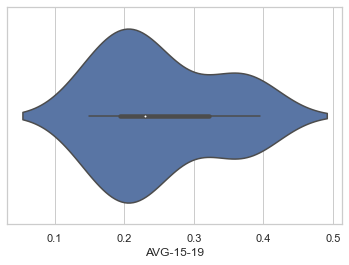

In [69]:
import seaborn as sns

sns.set_theme(style="whitegrid")

ax = sns.violinplot(x=df_merge["AVG-15-19"])

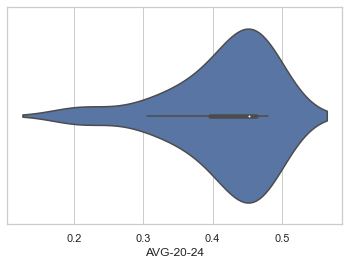

In [70]:
import seaborn as sns

sns.set_theme(style="whitegrid")

ax = sns.violinplot(x=df_merge["AVG-20-24"])

In [ ]:
 df1519["% Evolution"]=((df1519["2040"]/df1519["2020"])-1)*100

In [ ]:
df1519

In [ ]:
df2024["% Evolution"]=((df2024["2040"]/df2024["2020"])-1)*100
df2024